# TIME SERIES ANALYSIS - Electric Bill Prediction

![Imgur](https://i.imgur.com/aooy8xP.gif)

## Introduction
 

“Time series models are used to forecast future events based on previous events that have been observed (and data collected) at regular time intervals.”

## What is Time Series analysis
 
Time series forecasting is a technique for the prediction of events through a sequence of time. The technique is used across many fields of study, from geology to behavior to economics. The techniques predict future events by analyzing the trends of the past, on the assumption that future trends will hold similar to historical trends.

Time series forecasting is performed in a variety of applications including:

Weather forecasting
Earthquake prediction
Astronomy
Statistics
Mathematical finance
Econometrics
Pattern recognition
Signal processing
Control engineering

## Stages in Time Series Forecasting
 
Solving a time series problem is a little different as compared to a regular modeling task. A simple/basic journey of solving a time series problem can be demonstrated through the following processes. We will understand about tasks which one needs to perform in every stage. We will also look at the python implementation of each stage of our problem-solving journey.

Steps are –

<b>1. Visualizing time series</b>

In this step, we try to visualize the series. We try to identify all the underlying patterns related to the series like trend and seasonality. Do not worry about these terms right now, as we will discuss them during implementation. You can say that this is more a type of exploratory analysis of time series data.

<b>2. Stationarising time series</b>

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., “stationarised”) through the use of mathematical transformations. A stationarised series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past! Another reason for trying to stationarise a time series is to be able to obtain meaningful sample statistics such as means, variances, and correlations with other variables. Such statistics are useful as descriptors of future behavior only if the series is stationary. For example, if the series is consistently increasing over time, the sample mean and variance will grow with the size of the sample, and they will always underestimate the mean and variance in future periods. And if the mean and variance of a series are not well-defined, then neither are its correlations with other variables.

<b>3. Finding the best parameters for our model</b>

We need to find optimal parameters for forecasting models one’s we have a stationary series. These parameters come from the ACF and PACF plots. Hence, this stage is more about plotting above two graphs and extracting optimal model parameters based on them. Do not worry, we will cover on how to determine these parameters during the implementation part below!

<b>4. Fitting model</b>

Once we have our optimal model parameters, we can fit an ARIMA model to learn the pattern of the series. Always remember that time series algorithms work on stationary data only hence making a series stationary is an important aspect

<b>5. Predictions</b>

After fitting our model, we will be predicting the future in this stage. Since we are now familiar with a basic flow of solving a time series problem, let us get to the implementation.

### Problem Statement 
 
The dataset can be downloaded from here. It contains only 2 columns, one column is Date and the other column relates to the consumption percentage.

It shows the consumption of electricity from 1985 till 2018. The goal is to predict electricity consumption for the next 6 years i.e. till 2024.

In [80]:
#import the Libraries 
import pandas as pd
import numpy as np

In [11]:
#load the dataset
data = pd.read_excel("data/Electric_Production.xlsx")
data.head()

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [12]:
#Define columns
data.columns = ['Date', 'Consumption']
#drop nul values
data.dropna()
#convert into date type
data['Date'] = pd.to_datetime(data['Date'])
#Set date as index
data.set_index('Date',inplace=True)

data.head()



,Consumption
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


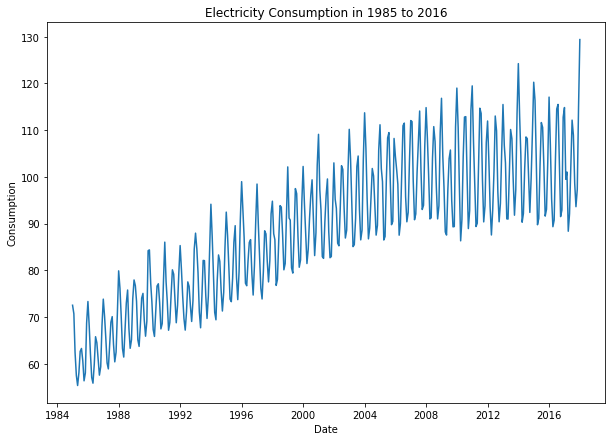

In [19]:
# EDA - Visualizing the Time Series
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 10,7
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title("Electricity Consumption in 1985 to 2016")
plt.plot(data)

Hence, we have identified that our series is not stationary. We need to have a stationary series to do time series forecasting. In the next stage, we will try to convert this into a stationary series.

Lets us plot the scatterplot:

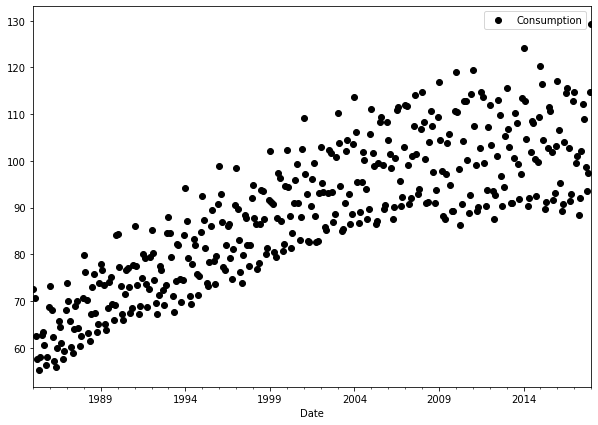

In [35]:
data.plot(style='k.',marker = 'o',)
plt.show()

We can observe a near-normal distribution(bell-curve) over consumption values.

Also, a given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

- Level: The average value in the series.
- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series. <br><br>
In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

So let us separate Trend and Seasonality from the time series.

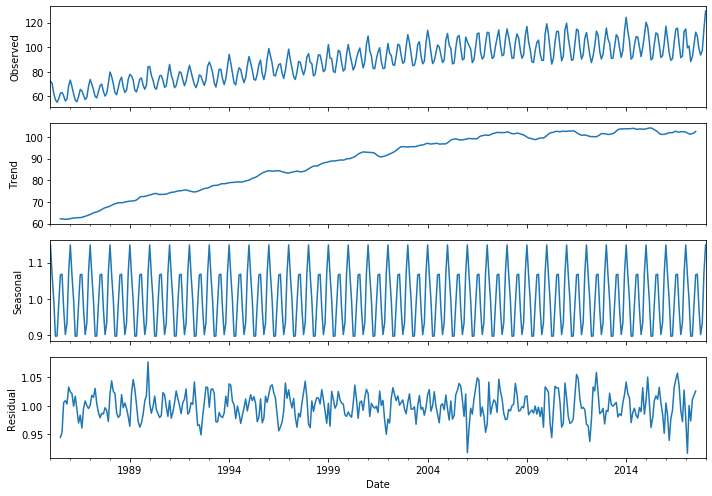

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data , model='multiplicative')
result.plot()
plt.show()

This gives us more insight into our data and real-world actions. Clearly, there is an upward trend and a recurring event where electricity consumption shoots maximum every year.

2. Stationarising the time series.

First, we need to check if a series is stationary or not.

- ADF (Augmented Dickey-Fuller) Test

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

- Null Hypothesis: The series has a unit root (value of a =1)

- Alternate Hypothesis: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary (we will understand more about difference stationary in the next section).

If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

The following function is one that can plot a series with its rolling mean and standard deviation.


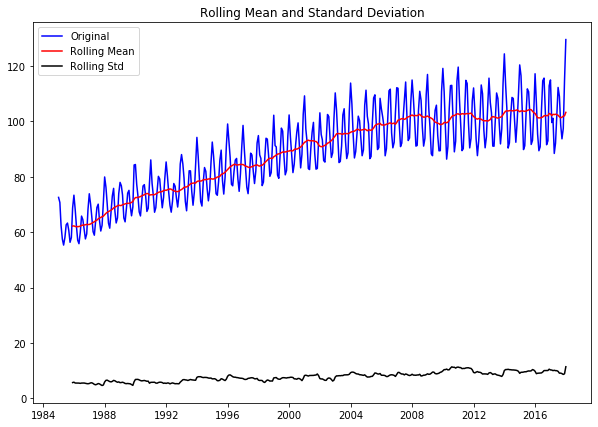

Results of dickey fuller test
Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [40]:
from statsmodels.tsa.stattools import adfuller

def test_Stationarity(timeseries):
    #Determine rolling Statistics
    roll_mean = timeseries.rolling(12).mean()
    roll_std = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['Consumption'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_Stationarity(data)

Through the above graph, we can see the increasing mean and standard deviation and hence our series is not stationary.

We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.

To get a stationary series, we need to eliminate the trend and seasonality from the series.

we start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series.

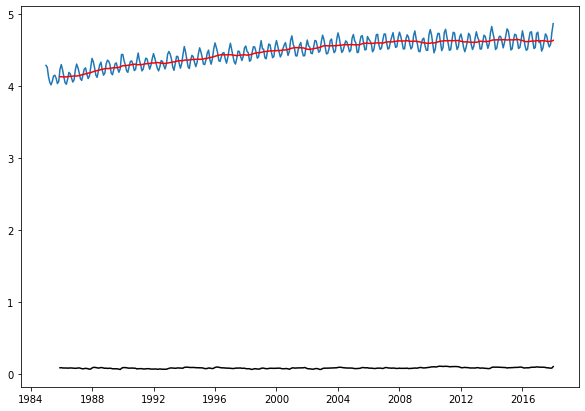

In [42]:
#Taking log of the series
data_log = np.log(data)

#Moving average by taking last 12 months average
data_movingAvg = data_log.rolling(12).mean()
data_movingStd = data_log.rolling(12).std()

#plotting moving average
plt.plot(data_log)
plt.plot(data_movingAvg, color = 'red')
plt.plot(data_movingStd, color = 'black')
plt.show()

After finding the mean, we take the difference of the series and the mean at every point in the series.

This way, we eliminate trends out of a series and obtain a more stationary series.

In [43]:
data_log_moving_avg_diff = data_log-data_movingAvg
data_log_moving_avg_diff.dropna(inplace=True)

Perform the Dickey-Fuller test (ADFT) once again. We have to perform this function every time to check whether the data is stationary or not.

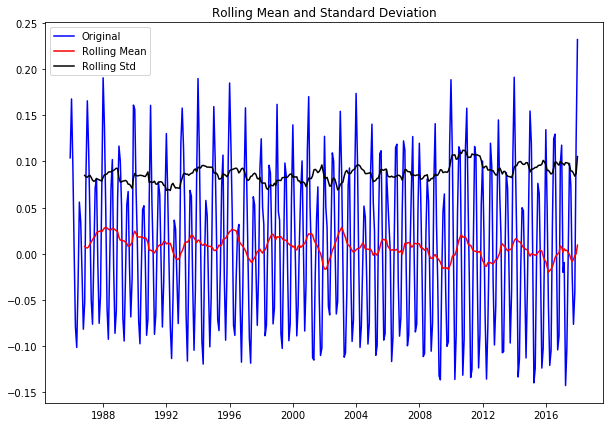

Results of dickey fuller test
Test Statistics                 -5.211586
p-value                          0.000008
No. of lags used                15.000000
Number of observations used    370.000000
critical value (1%)             -3.448148
critical value (5%)             -2.869383
critical value (10%)            -2.570948
dtype: float64


In [44]:
test_Stationarity(data_log_moving_avg_diff)

From the above graph, we observed that the data attained stationarity.

One of the modules is completed as we came to a conclusion. We need to check the weighted average, to understand the trend of the data in time series. Take the previous log data and to perform the following operation.

In [46]:
weighted_average = data_log.ewm(halflife=12, min_periods=0,adjust=True).mean()
weighted_average

,Consumption
Date,
1985-01-01,4.283658
1985-02-01,4.270484
1985-03-01,4.222468
1985-04-01,4.175897
1985-05-01,4.139460
1985-06-01,4.124617
1985-07-01,4.126721
1985-08-01,4.129808
1985-09-01,4.126240


The exponential moving average (EMA) is a weighted average of the last n prices, where the weighting decreases exponentially with each previous price/period. In other words, the formula gives recent prices more weight than past prices.

Previously we subtracted df_log with moving average, now take the same df_log and subtract with weighted_average and perform the Dickey-Fuller test (ADFT) once again.

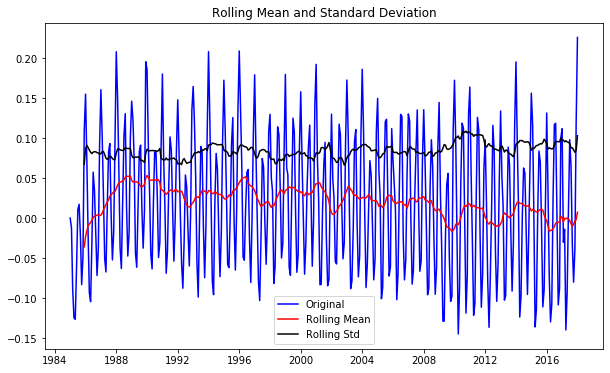

Results of dickey fuller test
Test Statistics                 -3.251531
p-value                          0.017189
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [48]:
dataLog_weightedAvg_diff = data_log-weighted_average
dataLog_weightedAvg_diff.dropna()

rcParams['figure.figsize'] = 10,6
#test Stationarity
test_Stationarity(dataLog_weightedAvg_diff)

From the above graph, we observed that the data attained stationarity. We also see that the test statistics and critical value is relatively equal.

There can be cases when there is a high seasonality in the data.

In those cases, just removing the trend will not help much. We need to also take care of the seasonality in the series. One such method for this task is differencing.

Differencing is a method of transforming a time series dataset.

It can be used to remove the series dependence on time, so-called temporal dependence. This includes structures like trends and seasonality. Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.

Differencing is performed by subtracting the previous observation from the current observation.
Perform the Dickey-Fuller test (ADFT) once again.

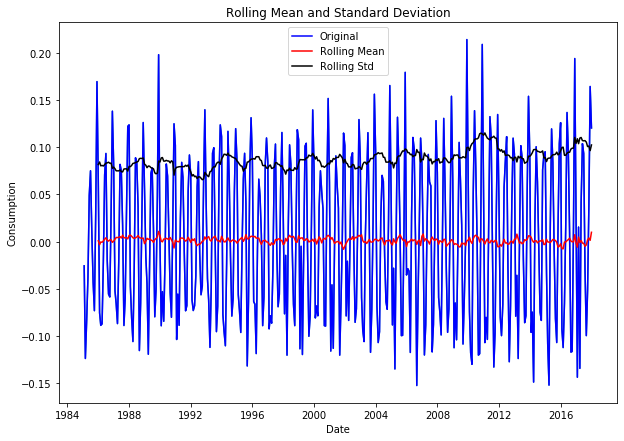

Results of dickey fuller test
Test Statistics               -6.748333e+00
p-value                        2.995161e-09
No. of lags used               1.400000e+01
Number of observations used    3.810000e+02
critical value (1%)           -3.447631e+00
critical value (5%)           -2.869156e+00
critical value (10%)          -2.570827e+00
dtype: float64


In [53]:
#taking difference of log series and seasonal
data_log_diff = data_log - data_log.shift()

#plotting
rcParams['figure.figsize'] = 10,7
plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.plot(data_log_diff)#Let us test the stationarity of our resultant series
data_log_diff.dropna(inplace=True)

#Augumented Dickey Fuller Test ADFT
test_Stationarity(data_log_diff)

The next step is to perform decomposition which provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model. Finally, perform the Dickey-Fuller test (ADFT) once again.

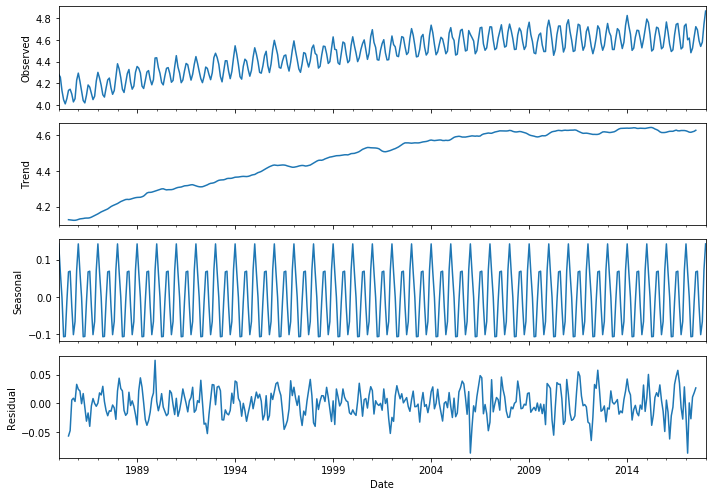

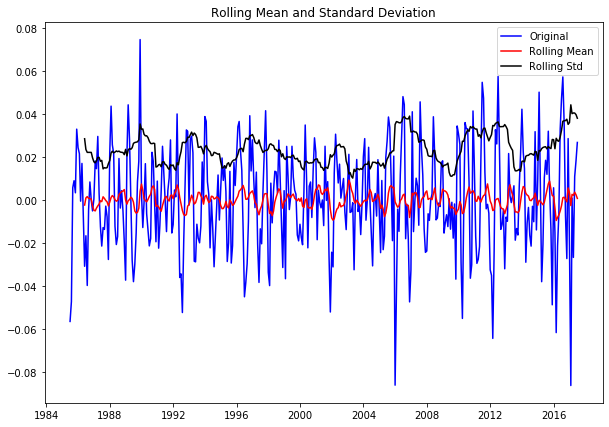

Results of dickey fuller test
Test Statistics               -1.000311e+01
p-value                        1.861632e-17
No. of lags used               1.400000e+01
Number of observations used    3.700000e+02
critical value (1%)           -3.448148e+00
critical value (5%)           -2.869383e+00
critical value (10%)          -2.570948e+00
dtype: float64


In [56]:
#Decompose the data_log with additive model as our series has not increasing trend 
result = seasonal_decompose(data_log, model='additive', freq = 12)

result.plot()
plt.show()

trend = result.trend
trend.dropna(inplace=True)

seasonality = result.seasonal
seasonality.dropna(inplace=True)

residual = result.resid
residual.dropna(inplace=True)

#ADFT for irregularity in series
test_Stationarity(residual)

After the decomposition, if we look at the residual then we have clearly a flat line for both mean and standard deviation. We have got our stationary series and now we can move to find the best parameters for our model.

3. Finding the best parameters for our model

Before we go on to build our forecasting model, we need to determine optimal parameters for our model. For those optimal parameters, we need ACF and PACF plots.

A nonseasonal ARIMA model is classified as an “ARIMA(p,d,q)” model, where:

- p → Number of autoregressive terms,

- d → Number of nonseasonal differences needed for stationarity, and

- q → Number of lagged forecast errors in the prediction equation.

Values of p and q come through ACF and PACF plots. So let us understand both ACF and PACF!

- Autocorrelation Function(ACF)
 
Statistical correlation summarizes the strength of the relationship between two variables. Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

We can calculate the correlation for time series observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

 

- Partial Autocorrelation Function(PACF)
 
A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

The autocorrelation for observation and observation at a prior time step is comprised of both the direct correlation and indirect correlations. It is these indirect correlations that the partial autocorrelation function seeks to remove.

Below code plots, both ACF and PACF plots for us:

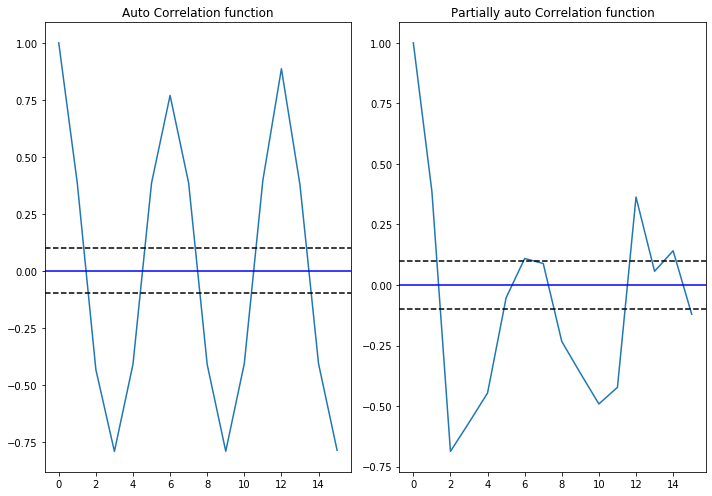

In [64]:
from statsmodels.tsa.stattools import acf,pacf # import AutoCorrelation Function

# we use d value here(data_log_shift)
acf = acf(data_log_diff, nlags=15) #ACF
pacf= pacf(data_log_diff, nlags=15,method='ols') #PACF Partial Auto Correlation Function

#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='black')
plt.title('Auto Correlation function')
plt.tight_layout()#plot ACF


plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='black')
plt.title('Partially auto Correlation function')
plt.tight_layout()

4. Fitting model

In order to find the p and q values from the above graphs, we need to check, where the graph cuts off the origin or drops to zero for the first time from the above graphs the p and q values are merely close to 3 where the graph cuts off the origin ( draw the line to x-axis) now we have p,d,q values. So now we can substitute in the ARIMA model and let's see the output.

RSS : 0.522655


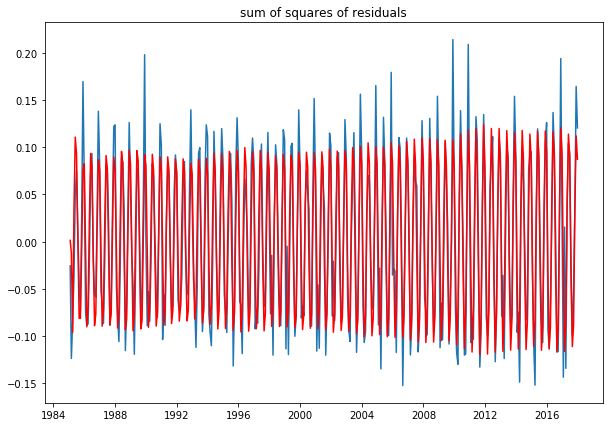

In [73]:
#Import ARIMA(p,d,q)
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data_log, order=(3,1,3))
result_AR = model.fit(disp = 0)

#plotting
plt.plot(data_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR.fittedvalues-data_log_diff["Consumption"])**2))

Less the RSS value, the more effective the model is. You check with (2,1,0),(3,1,1), etc to look for the smallest values of RSS.

5. Predictions

The following code helps us to forecast electicity consumption for the next 6 years.

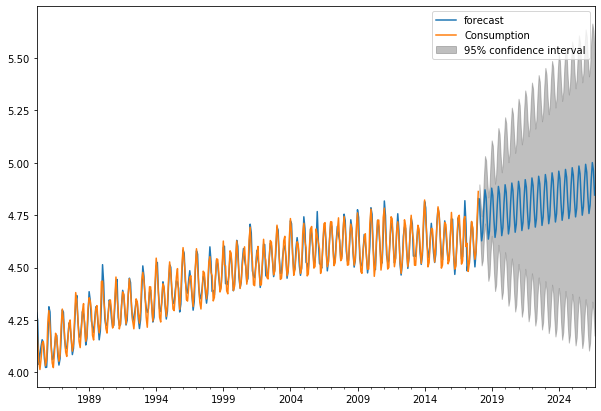

In [79]:
result_AR.plot_predict(1,500)
x=result_AR.forecast(steps=200)



From the above graph, we calculated the future predictions till 2024 the greyed out area is the confidence interval that means the predictions will not cross that area.

Conclusion
 
Finally, we were able to build an ARIMA model and actually forecast for a future time period. 